In [564]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import warnings
warnings.filterwarnings('ignore')

In [565]:
custom_colors = ["plum", "cadetblue","cyan","lightcoral","springgreen"]

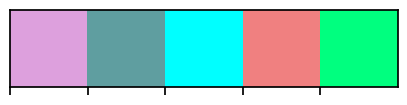

In [566]:
sns.palplot(custom_colors,size=1)
plt.show()

In [567]:
sns.set_context("notebook")

In [568]:
players = pd.read_csv('Player.csv')
players.head()

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,1,SC Ganguly,08-Jul-72,Left_Hand,Right-arm medium,India,0,NaN
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia,0,NaN
3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia,0,NaN
4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan,0,NaN


In [569]:
players = players.drop(["Is_Umpire", "Unnamed: 7"], axis = 1)
players.head(10)

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,1,SC Ganguly,08-Jul-72,Left_Hand,Right-arm medium,India
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia
3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia
4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan
5,6,R Dravid,11-Jan-73,Right_Hand,Right-arm offbreak,India
6,7,W Jaffer,16-Feb-78,Right_Hand,Right-arm offbreak,India
7,8,V Kohli,05-Nov-88,Right_Hand,Right-arm medium,India
8,9,JH Kallis,16-Oct-75,Right_Hand,Right-arm fast-medium,South Africa
9,10,CL White,18-Aug-83,Right_Hand,Legbreak googly,Australia


In [570]:
runs = pd.read_csv('Ball_by_Ball.csv')
runs.head(10)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,
5,335987,1,1,6,1,2,2,2,1,14,0,,,,,
6,335987,1,1,7,1,2,2,2,1,14,0,legbyes,1,,,
7,335987,1,2,1,1,2,2,2,1,15,0,,,,,
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,


In [571]:
runs.Dissimal_Type.unique()

array([' ', 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

* .replace(r'^\s*$', np.nan, regex=True)

Replaces values in that column according to a rule.

* r'^\s*$' → this regex pattern means:

* ^ = start of string

* \s* = zero or more whitespace characters (spaces, tabs, etc.)

* $ = end of string
→ So it matches any string that is empty or contains only whitespace.

np.nan → replacement value (a NaN = missing value).

regex=True → tells pandas to interpret the first argument as a regex instead of a literal string.

In [572]:
runs['Dissimal_Type'] = runs['Dissimal_Type'].replace(r'^\s*$', np.nan, regex=True)

In [573]:
runs.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,NaN,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,NaN,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,NaN,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,NaN,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,NaN,


In [574]:
runs.dtypes

Match_Id                     int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored              object
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [575]:
runs["Extra_Runs"] = pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"] = runs["Extra_Runs"].fillna(0)

## if there are invalid values (like "NA", "abc", or blanks), then:
## errors="coerce" → turns those invalid values into NaN instead of raising an error.

runs["Batsman_Scored"] = pd.to_numeric(runs["Batsman_Scored"], errors="coerce")
runs["Batsman_Scored"] = runs["Batsman_Scored"].fillna(0)

In [576]:
runs.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0.0,legbyes,1.0,,NaN,
1,335987,1,1,2,1,2,2,2,1,14,0.0,,0.0,,NaN,
2,335987,1,1,3,1,2,2,2,1,14,0.0,wides,1.0,,NaN,
3,335987,1,1,4,1,2,2,2,1,14,0.0,,0.0,,NaN,
4,335987,1,1,5,1,2,2,2,1,14,0.0,,0.0,,NaN,


### Batsmen

In [577]:
runs.Extra_Type.unique()

array(['legbyes', ' ', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [578]:
batsmen_runs = []
batsmen_ballsFaced = []

for i in runs["Striker_Id"].unique():
    r = runs["Batsman_Scored"][runs["Striker_Id"] == i].sum()
    b = runs["Match_Id"][runs["Striker_Id"] == i][runs["Extra_Type"] != "wides"].count()
    batsmen_runs.append(r)
    batsmen_ballsFaced.append(b)

batsmen = pd.DataFrame({"Player_Id": runs["Striker_Id"].unique()})

batsmen["Runs"] = batsmen_runs
batsmen["Balls_played"] = batsmen_ballsFaced

batsmen["Strike_Rate"] = (batsmen["Runs"] * 100 / batsmen["Balls_played"]).round(2)

In [579]:
batsmen.head()

,Player_Id,Runs,Balls_played,Strike_Rate
0,1,1349.0,1280,105.39
1,2,2435.0,1885,129.18
2,3,91.0,129,70.54
3,4,1322.0,1084,121.96
4,5,64.0,83,77.11


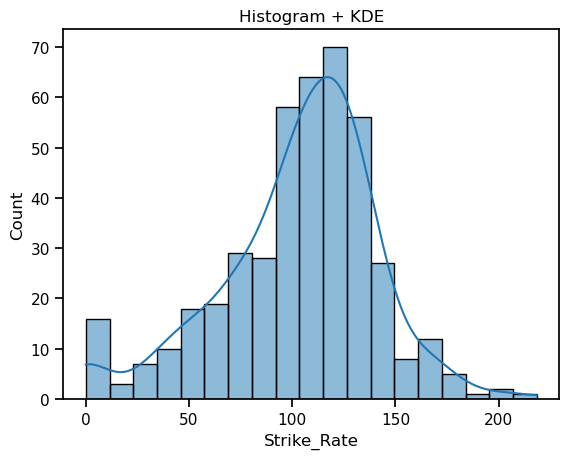

In [580]:
sns.histplot(batsmen["Strike_Rate"],kde=True)
plt.title('Histogram + KDE')
plt.show()

In [581]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,20),sharex=True)
    sns.boxplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Boxplot')
    sns.violinplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Violin plot')
    fig.suptitle(title, fontsize=25)
    plt.tight_layout(pad=3.0)
    plt.show()

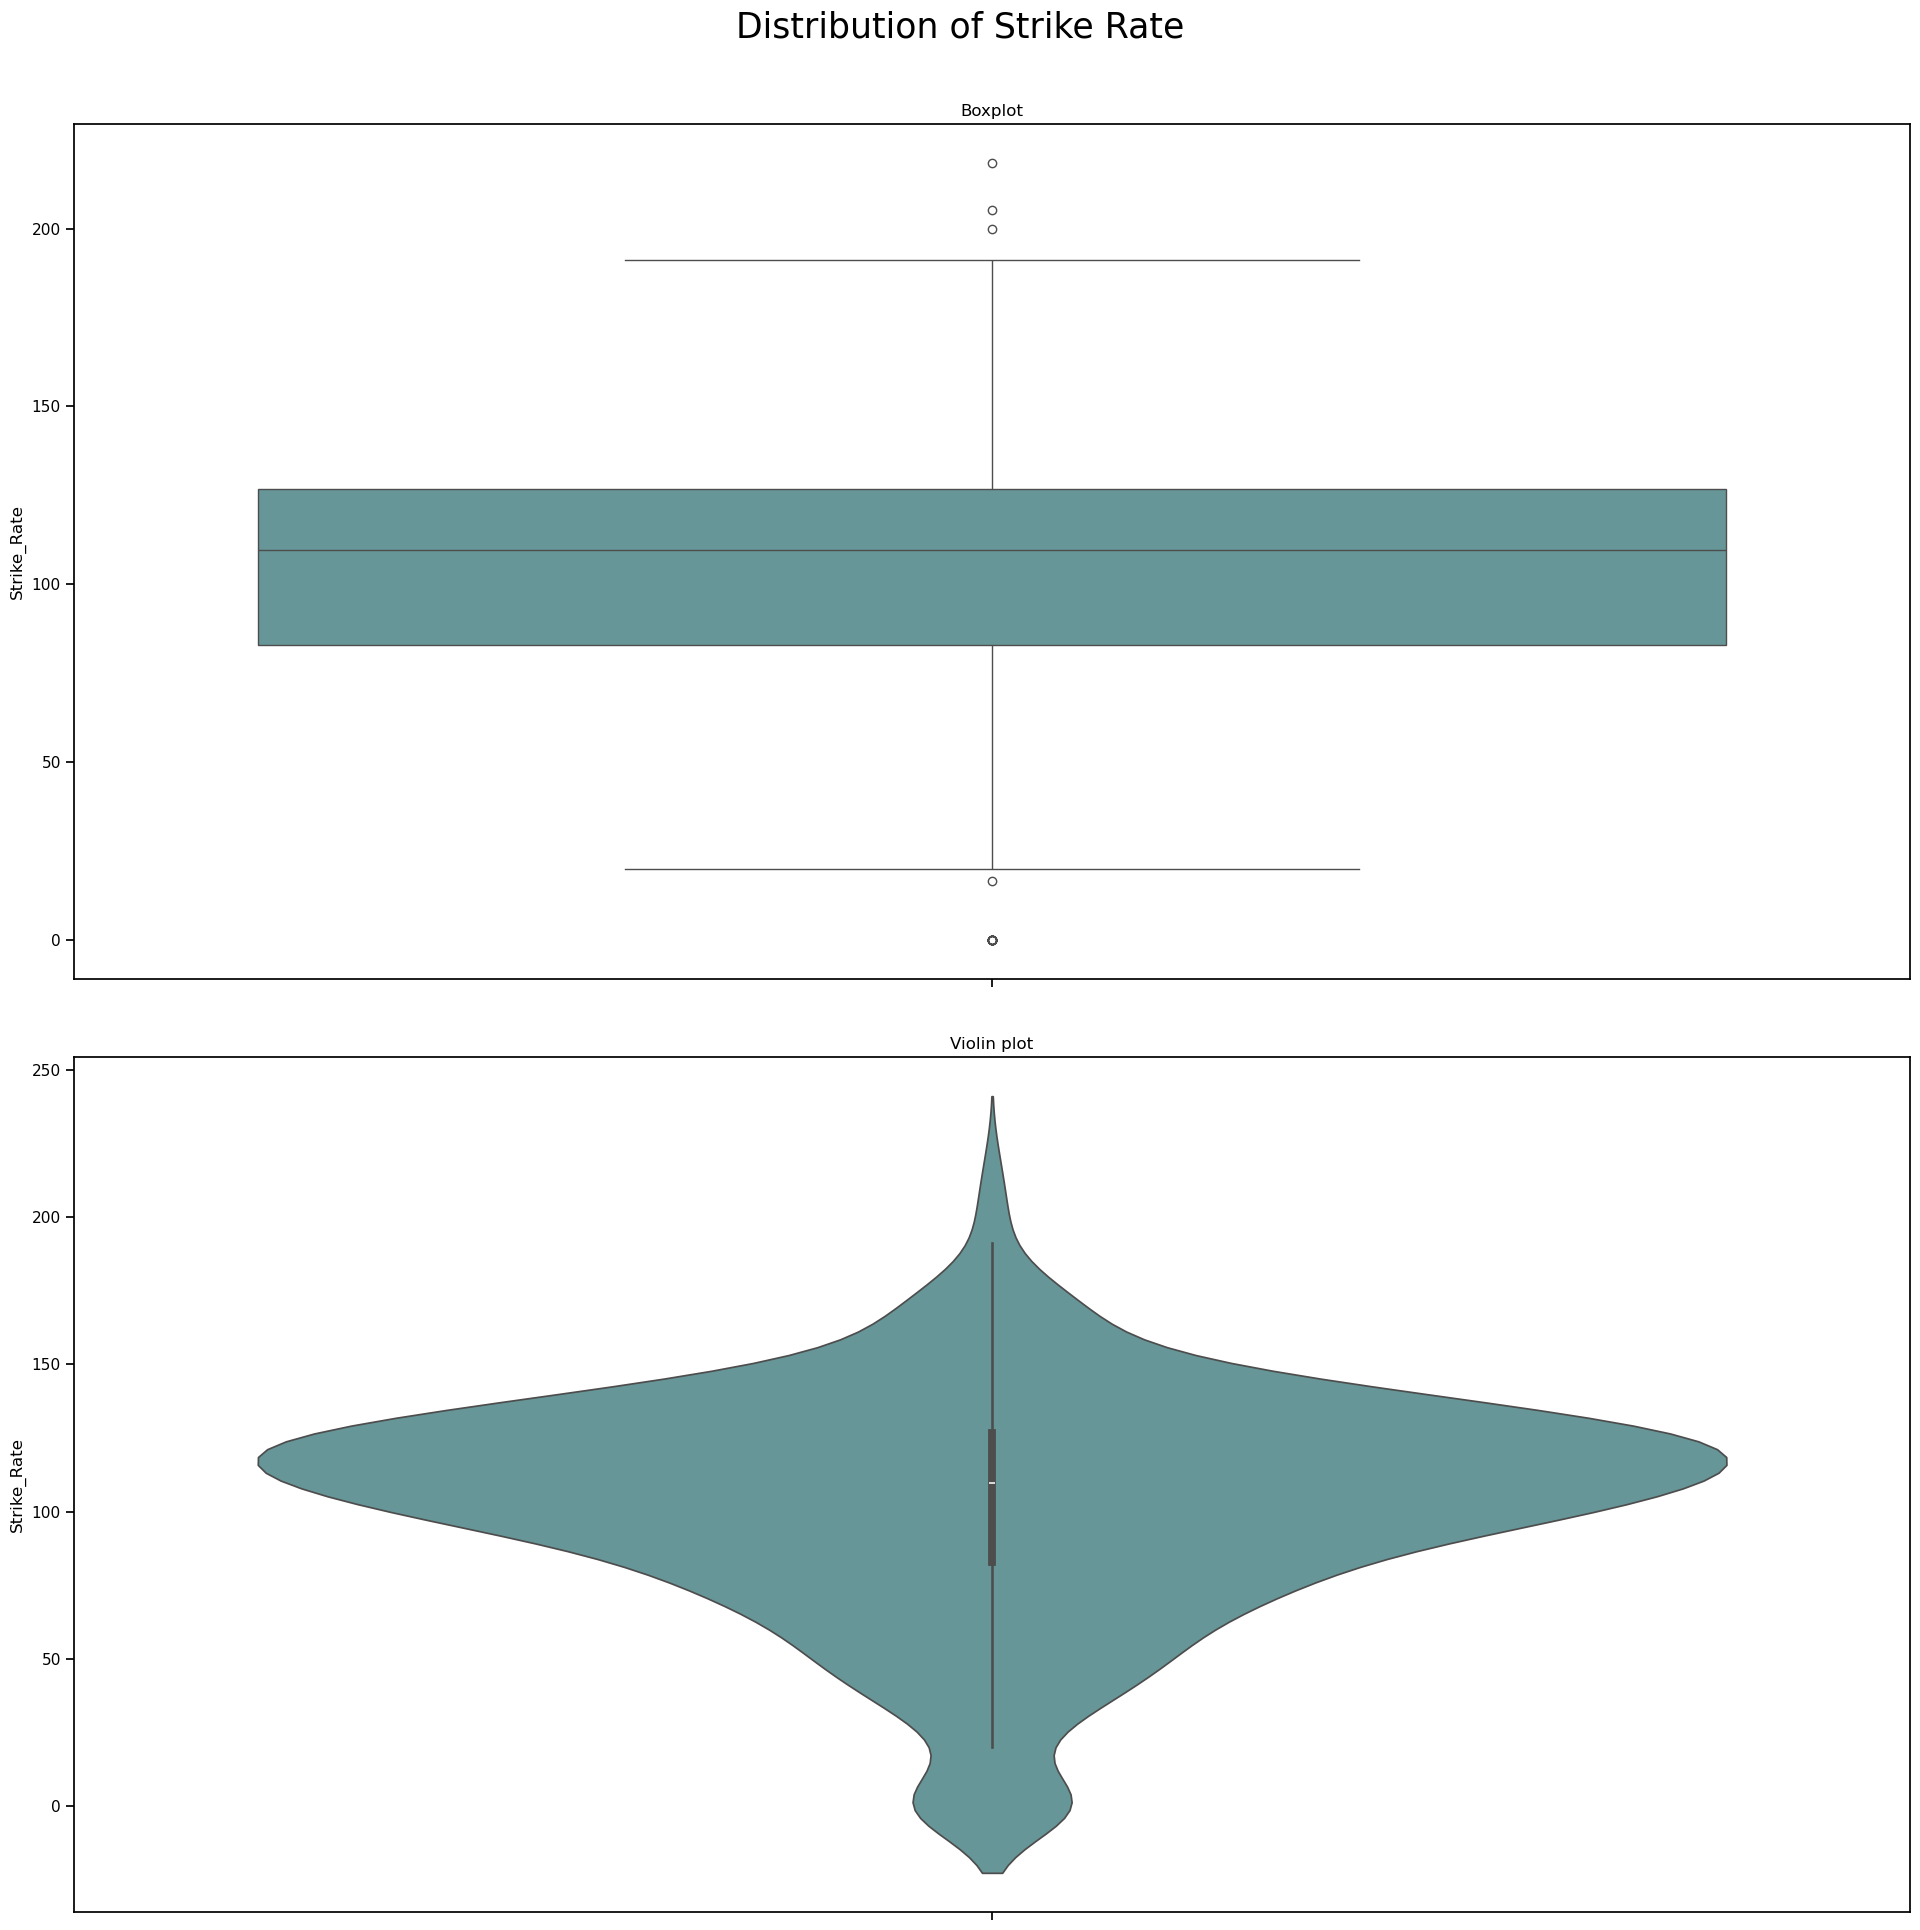

In [582]:
triple_plot(batsmen["Strike_Rate"],'Distribution of Strike Rate',custom_colors[1])

In [583]:
batsmen = batsmen[batsmen["Strike_Rate"] > 120]

In [584]:
batsmen.head()

,Player_Id,Runs,Balls_played,Strike_Rate
1,2,2435.0,1885,129.18
3,4,1322.0,1084,121.96
7,8,4105.0,3164,129.74
9,10,971.0,769,126.27
10,11,394.0,309,127.51


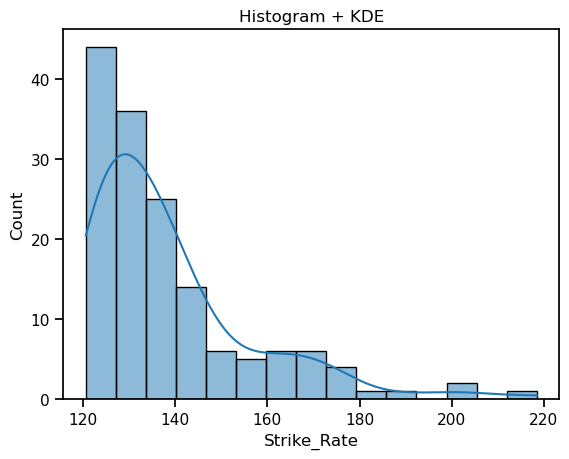

In [585]:
sns.histplot(batsmen["Strike_Rate"],kde=True)
plt.title('Histogram + KDE')
plt.show()

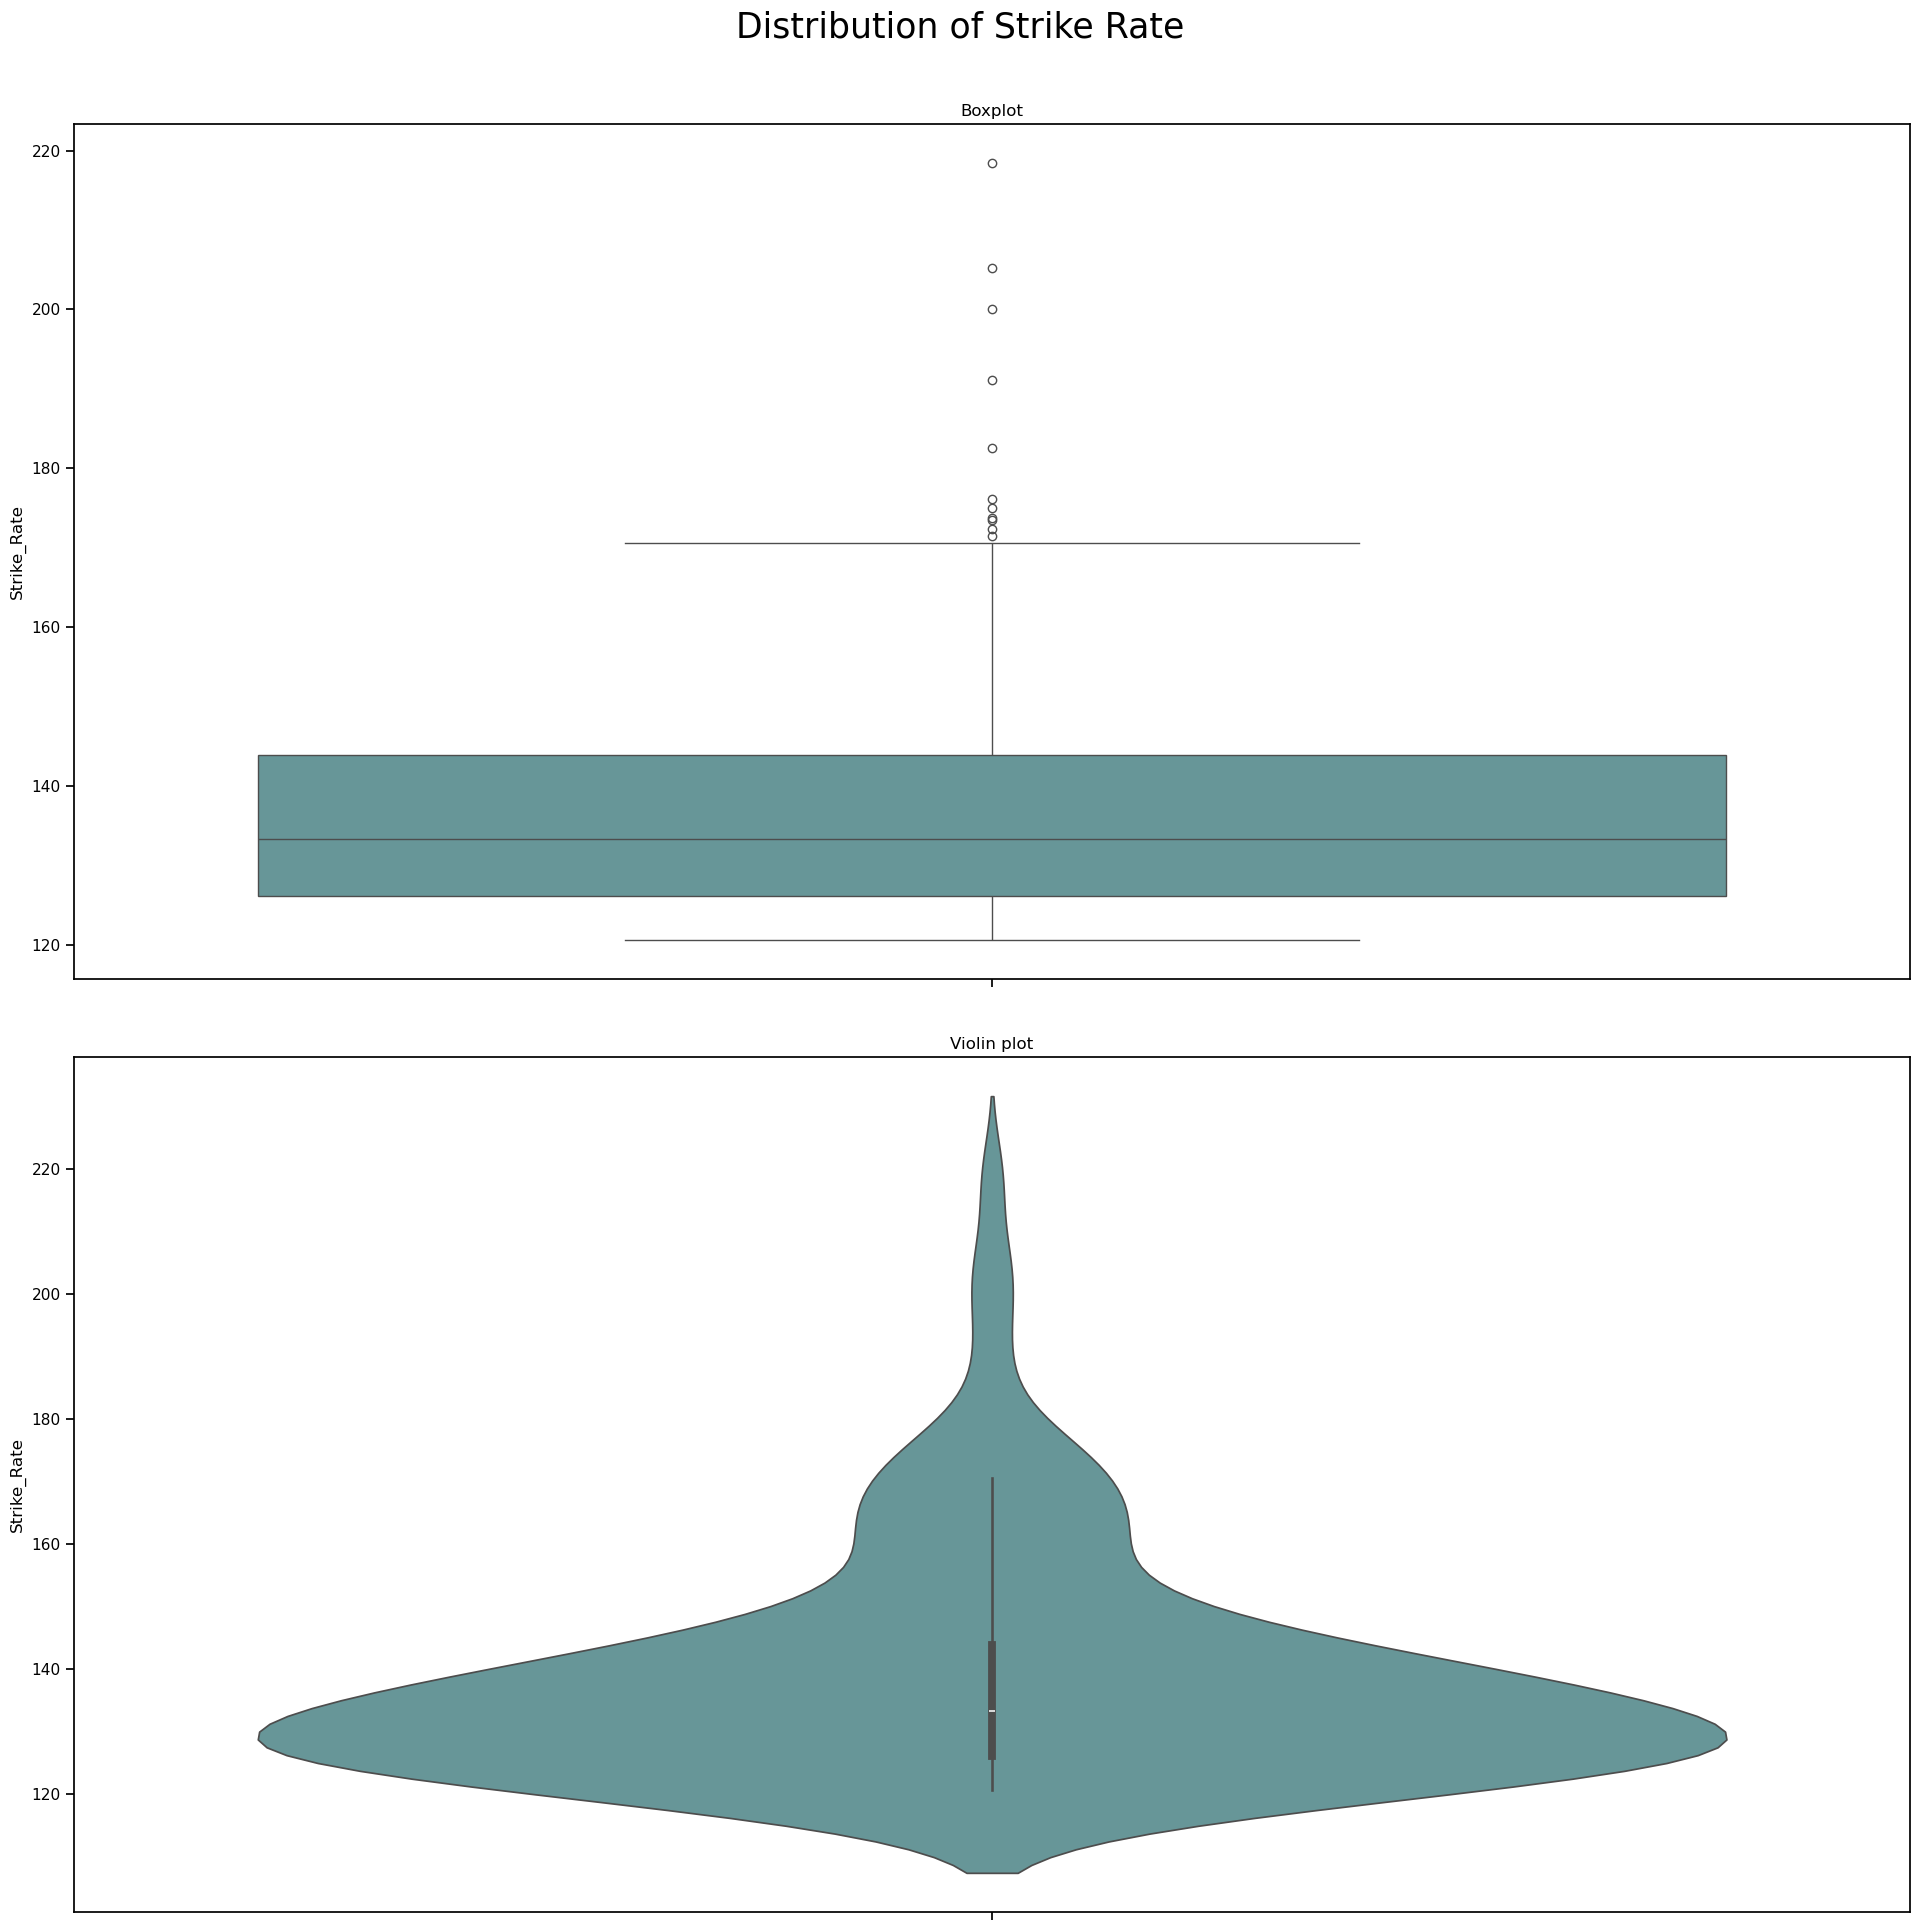

In [586]:
triple_plot(batsmen["Strike_Rate"],'Distribution of Strike Rate',custom_colors[1])

In [587]:
def scatter_plot(data,title,c,col1,col2):
    fig = plt.figure(figsize=(12,6))
    sns.scatterplot(x=col1, y=col2, data=data,color=c)
    plt.title(title)
    plt.show()

In [588]:
def elbow_method(X):
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(2,10) 

    for k in K:  
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)     

        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                          'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(kmeans.inertia_) 

        mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 
                     'euclidean'),axis=1)) / X.shape[0] 
        mapping2[k] = kmeans.inertia_ 

    print("Distortion")
    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val)) 

    print("Inertia")
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 

    plt.plot(K, distortions, 'bx-',color=custom_colors[3]) 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.xticks(K)
    plt.title('Elbow Method using Distortion') 
    plt.show() 

    plt.plot(K, inertias, 'bx-',color=custom_colors[4]) 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.xticks(K)
    plt.title('Elbow Method using Inertia') 
    plt.show() 

Distortion
2 : 371.5169478484956
3 : 279.5998917796085
4 : 172.88356556675456
5 : 140.54380431808113
6 : 111.01556592942379
7 : 101.80168446333342
8 : 87.89284567749357
9 : 73.97676570980501
Inertia
2 : 33069999.419227745
3 : 17559360.239637684
4 : 7201644.983151199
5 : 4875145.251608024
6 : 3495754.144551592
7 : 2644615.769996189
8 : 1705172.030459483
9 : 1290750.3401080486


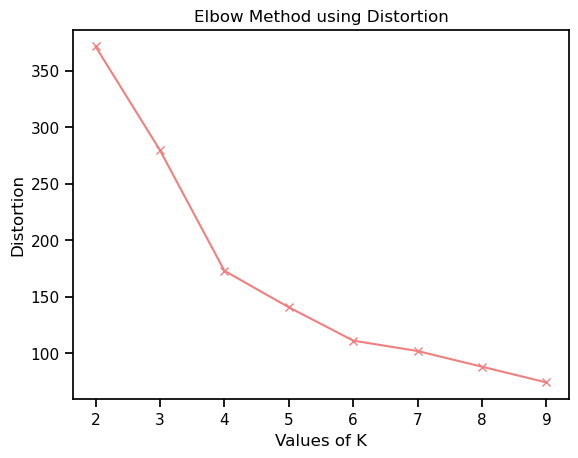

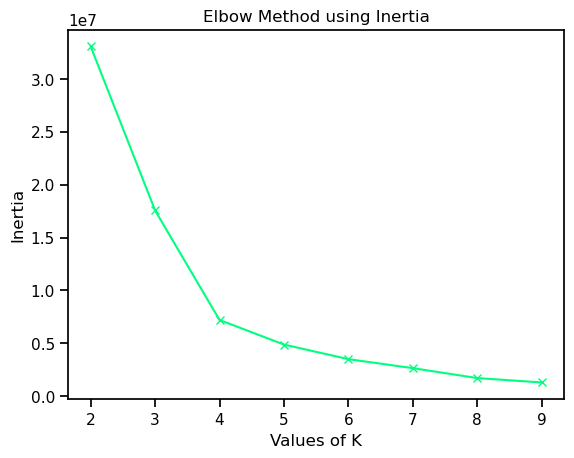

In [589]:
elbow_method(batsmen[["Strike_Rate", "Runs"]])

In [590]:
def scores(X):
    K = range(3,8) 

    for k in K:  
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X) 
        y_hat = kmeans.predict(X)
        labels = kmeans.labels_
        
        a = metrics.silhouette_score(X, labels, metric = 'euclidean')
        b = metrics.calinski_harabasz_score(X, labels)
        
        print("k={0}, Silhouette score={1}, Calinski harabasz score={2}".format(k,a, b))

In [591]:
scores(batsmen[["Strike_Rate", "Runs"]])

k=3, Silhouette score=0.6749296018004828, Calinski harabasz score=620.86287259551
k=4, Silhouette score=0.693456207855067, Calinski harabasz score=1007.674951302528
k=5, Silhouette score=0.6636420080750324, Calinski harabasz score=1147.0550748280905
k=6, Silhouette score=0.6157214501481452, Calinski harabasz score=1124.2454383359197
k=7, Silhouette score=0.6226470107038373, Calinski harabasz score=1390.243206271737


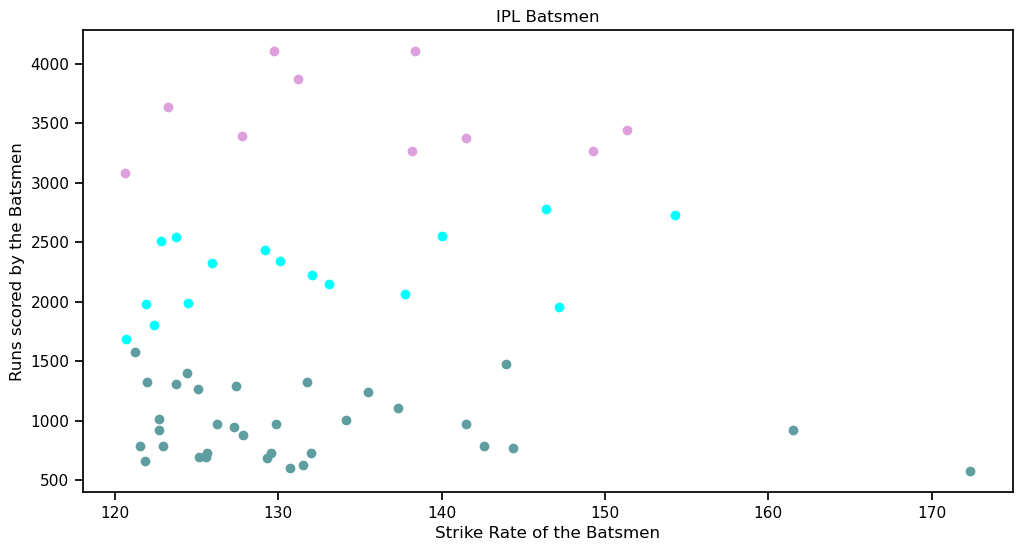

In [592]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(batsmen[["Strike_Rate", "Runs"]])
batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = custom_colors

for r in range(1,6):
    clustered_Batsmen = batsmen[batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_Rate"], clustered_Batsmen["Runs"], color=colors[r-1])
    
plt.title("IPL Batsmen")
plt.xlabel("Strike Rate of the Batsmen")
plt.ylabel("Runs scored by the Batsmen")
plt.show()

In [593]:
batsmen = batsmen.sort_values(by='cluster')

In [594]:
Players_batsmen = players[["Player_Id", "Player_Name","Batting_Hand","DOB","Country"]]

### Displaying the Batting Hand of Batsmen

In [595]:
batsmen = batsmen[batsmen.columns].merge(Players_batsmen, "left")
batsmen

,Player_Id,Runs,Balls_played,Strike_Rate,cluster,Player_Name,Batting_Hand,DOB,Country
0,12,76.0,55,138.18,0,B Akhil,Right_Hand,07-Oct-77,India
1,11,394.0,309,127.51,0,MV Boucher,Right_Hand,03-Dec-76,South Africa
2,28,237.0,186,127.42,0,SM Katich,Left_Hand,21-Aug-75,Australia
3,25,417.0,306,136.27,0,JR Hopes,Right_Hand,24-Oct-78,Australia
4,49,147.0,111,132.43,0,SM Pollock,Right_Hand,16-Jul-73,South Africa
...,...,...,...,...,...,...,...,...,...
146,64,1808.0,1477,122.41,3,DPMD Jayawardene,Right_Hand,27-May-77,Sri Lanka
147,2,2435.0,1885,129.18,3,BB McCullum,Right_Hand,27-Sep-81,New Zealand
148,26,1687.0,1398,120.67,3,KC Sangakkara,Left_Hand,27-Oct-77,Sri Lanka
149,27,2339.0,1798,130.09,3,Yuvraj Singh,Left_Hand,12-Dec-81,India


In [596]:
fig = px.sunburst(batsmen, path=['Batting_Hand', 'cluster'],color='cluster')
fig.show()

In [597]:
batsmen.to_csv('Batsmen.csv') 

### Bowlers

In [598]:
bowlers_runs = []
bowlers_over_count = []

for j in runs["Bowler_Id"].unique():
    r = runs["Batsman_Scored"][runs["Bowler_Id"] == j].sum() + runs["Extra_Runs"][runs["Bowler_Id"] == j].sum()
    o = runs["Over_Id"][runs["Bowler_Id"] == j].count()/6
    
    bowlers_runs.append(r)
    bowlers_over_count.append(o)
    
bowlers = pd.DataFrame({"Player_Id": runs["Bowler_Id"].unique()})

bowlers["Runs"] = bowlers_runs
bowlers["Over_count"] = bowlers_over_count

bowlers["Econ_Rate"] = (bowlers["Runs"] / bowlers["Over_count"]).round(2)

bowlers.head()

,Player_Id,Runs,Over_count,Econ_Rate
0,14,3135.0,421.500000,7.44
1,15,2511.0,338.333333,7.42
2,13,41.0,4.166667,9.84
3,9,2316.0,299.833333,7.72
4,16,82.0,9.166667,8.95


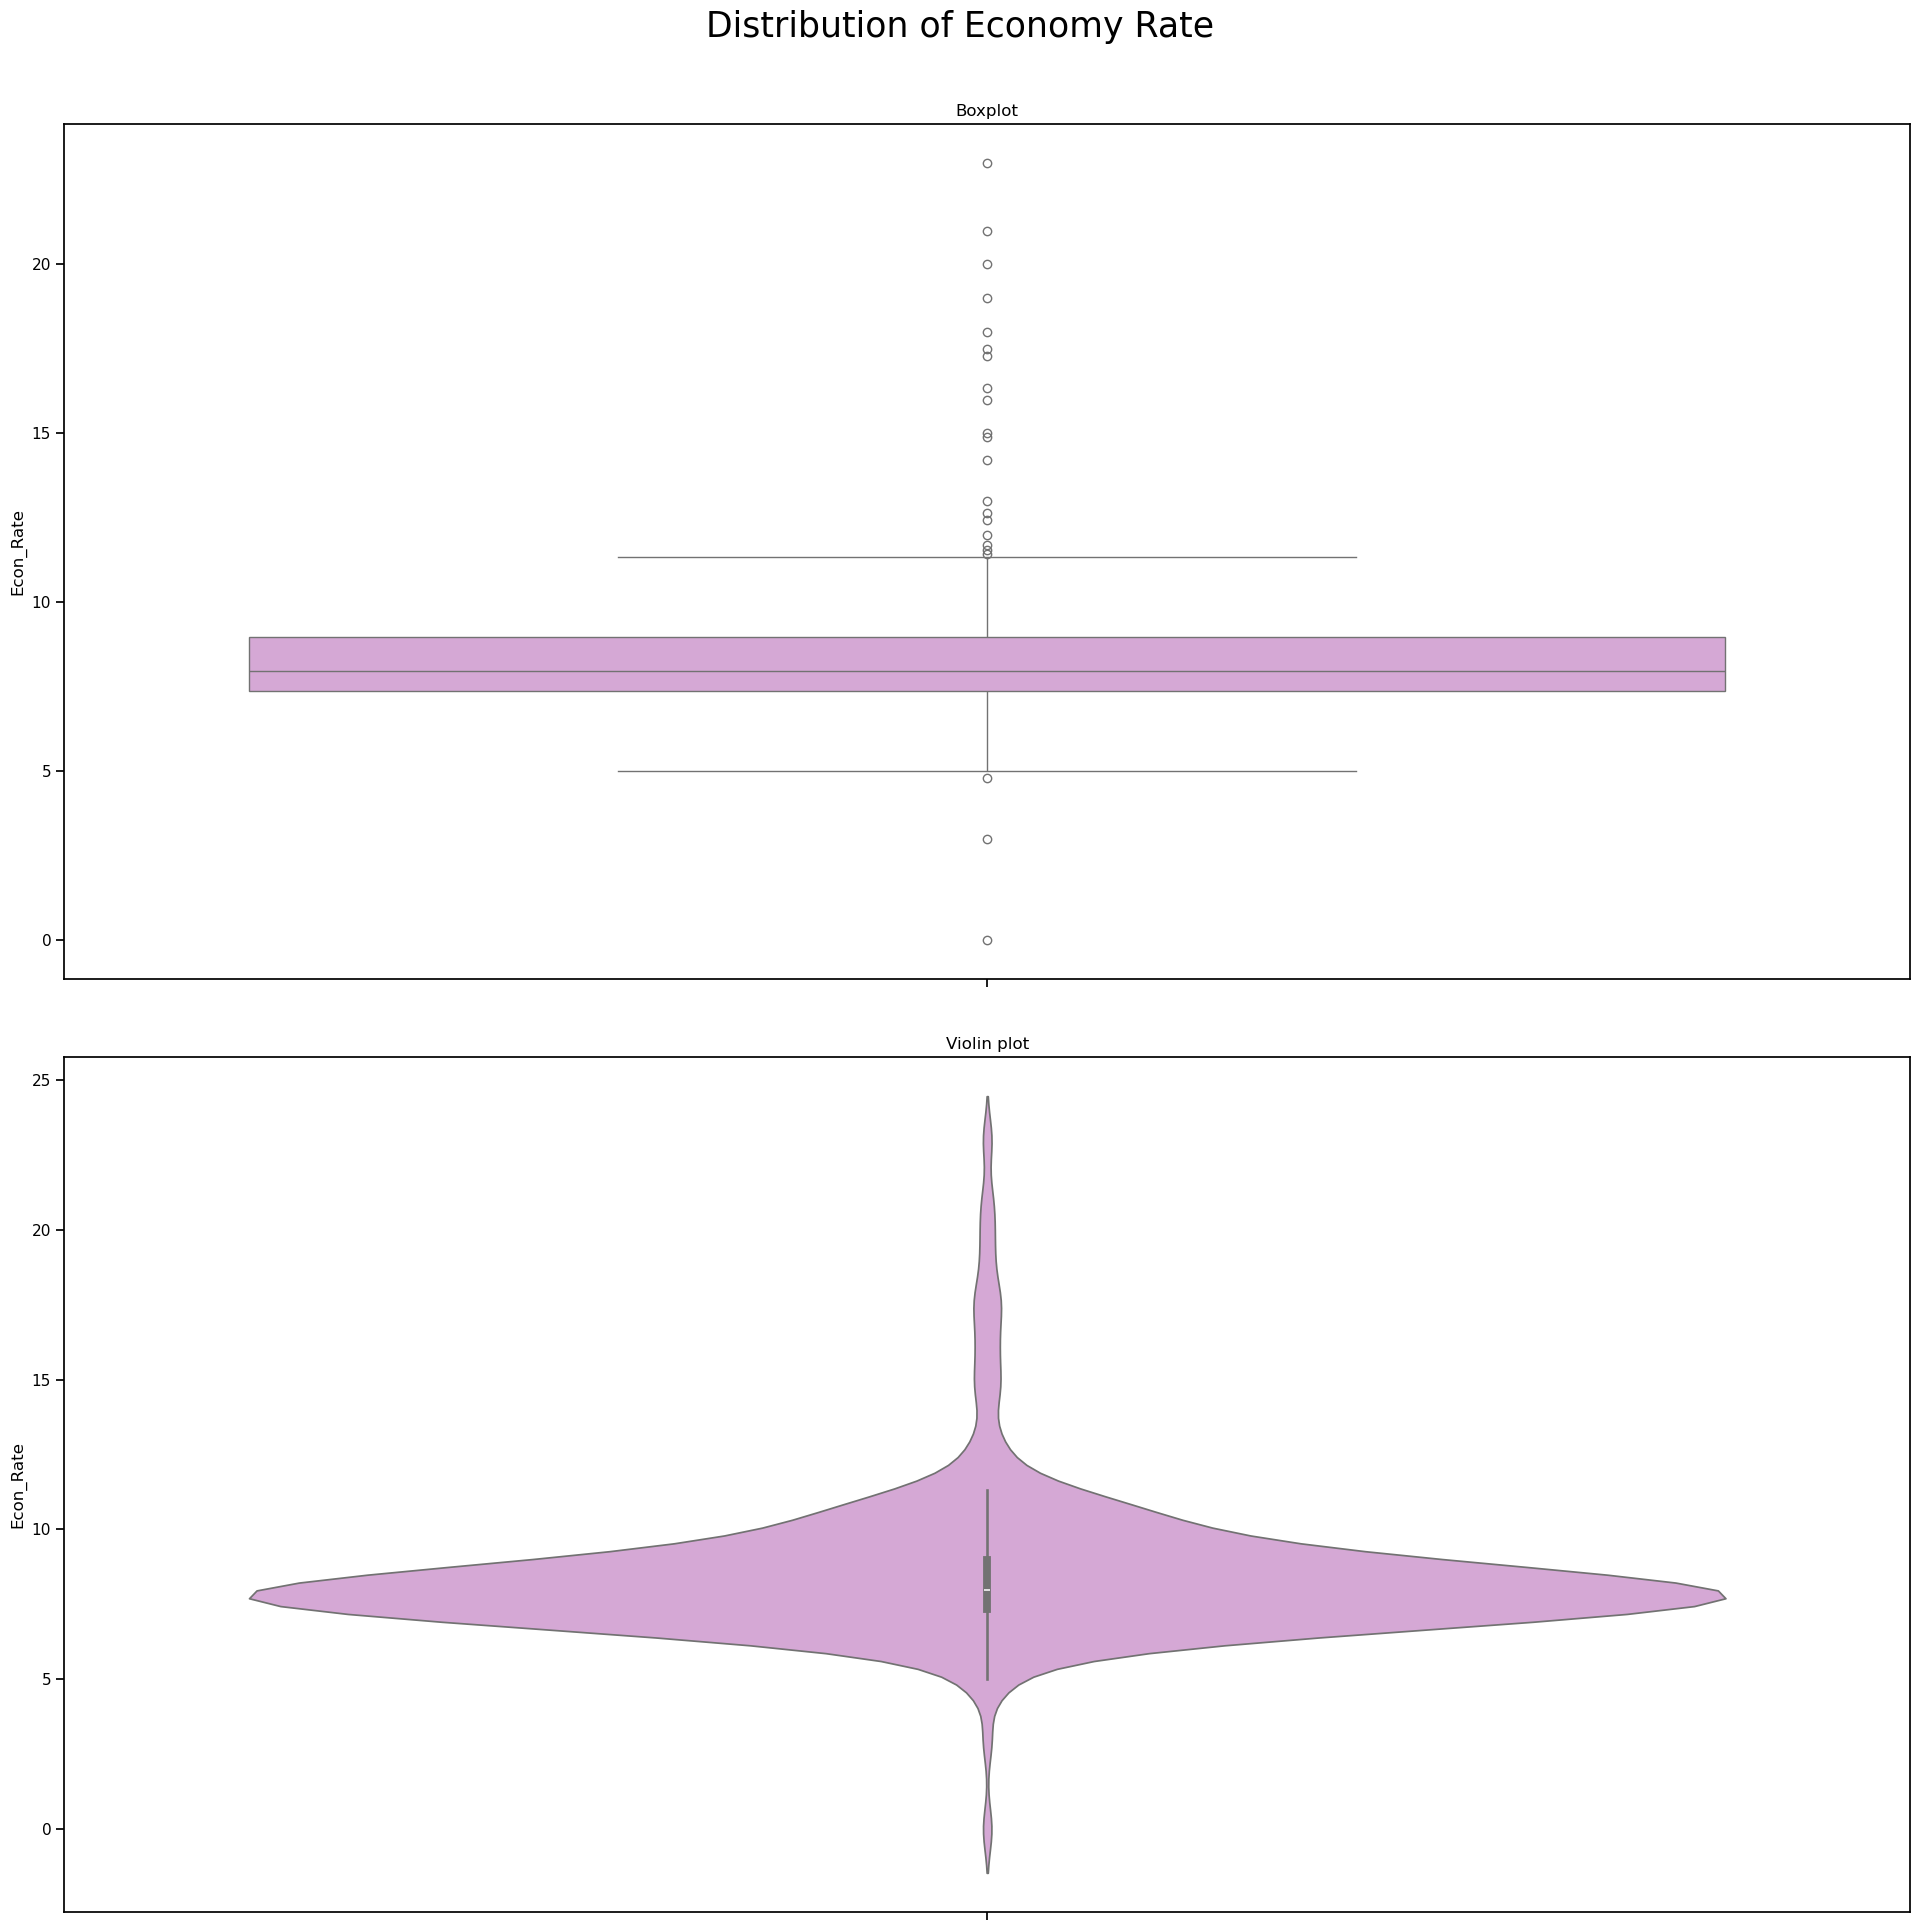

In [599]:
triple_plot(bowlers["Econ_Rate"],'Distribution of Economy Rate',custom_colors[0])

In [600]:
bowlers = bowlers[(bowlers["Econ_Rate"] > 4) & (bowlers["Econ_Rate"] < 8.5)]
bowlers

,Player_Id,Runs,Over_count,Econ_Rate
0,14,3135.0,421.500000,7.44
1,15,2511.0,338.333333,7.42
3,9,2316.0,299.833333,7.72
6,106,1961.0,254.000000,7.72
7,84,2092.0,266.500000,7.85
...,...,...,...,...
323,464,56.0,7.166667,7.81
326,430,117.0,17.166667,6.82
327,369,8.0,1.666667,4.80
329,465,42.0,5.500000,7.64


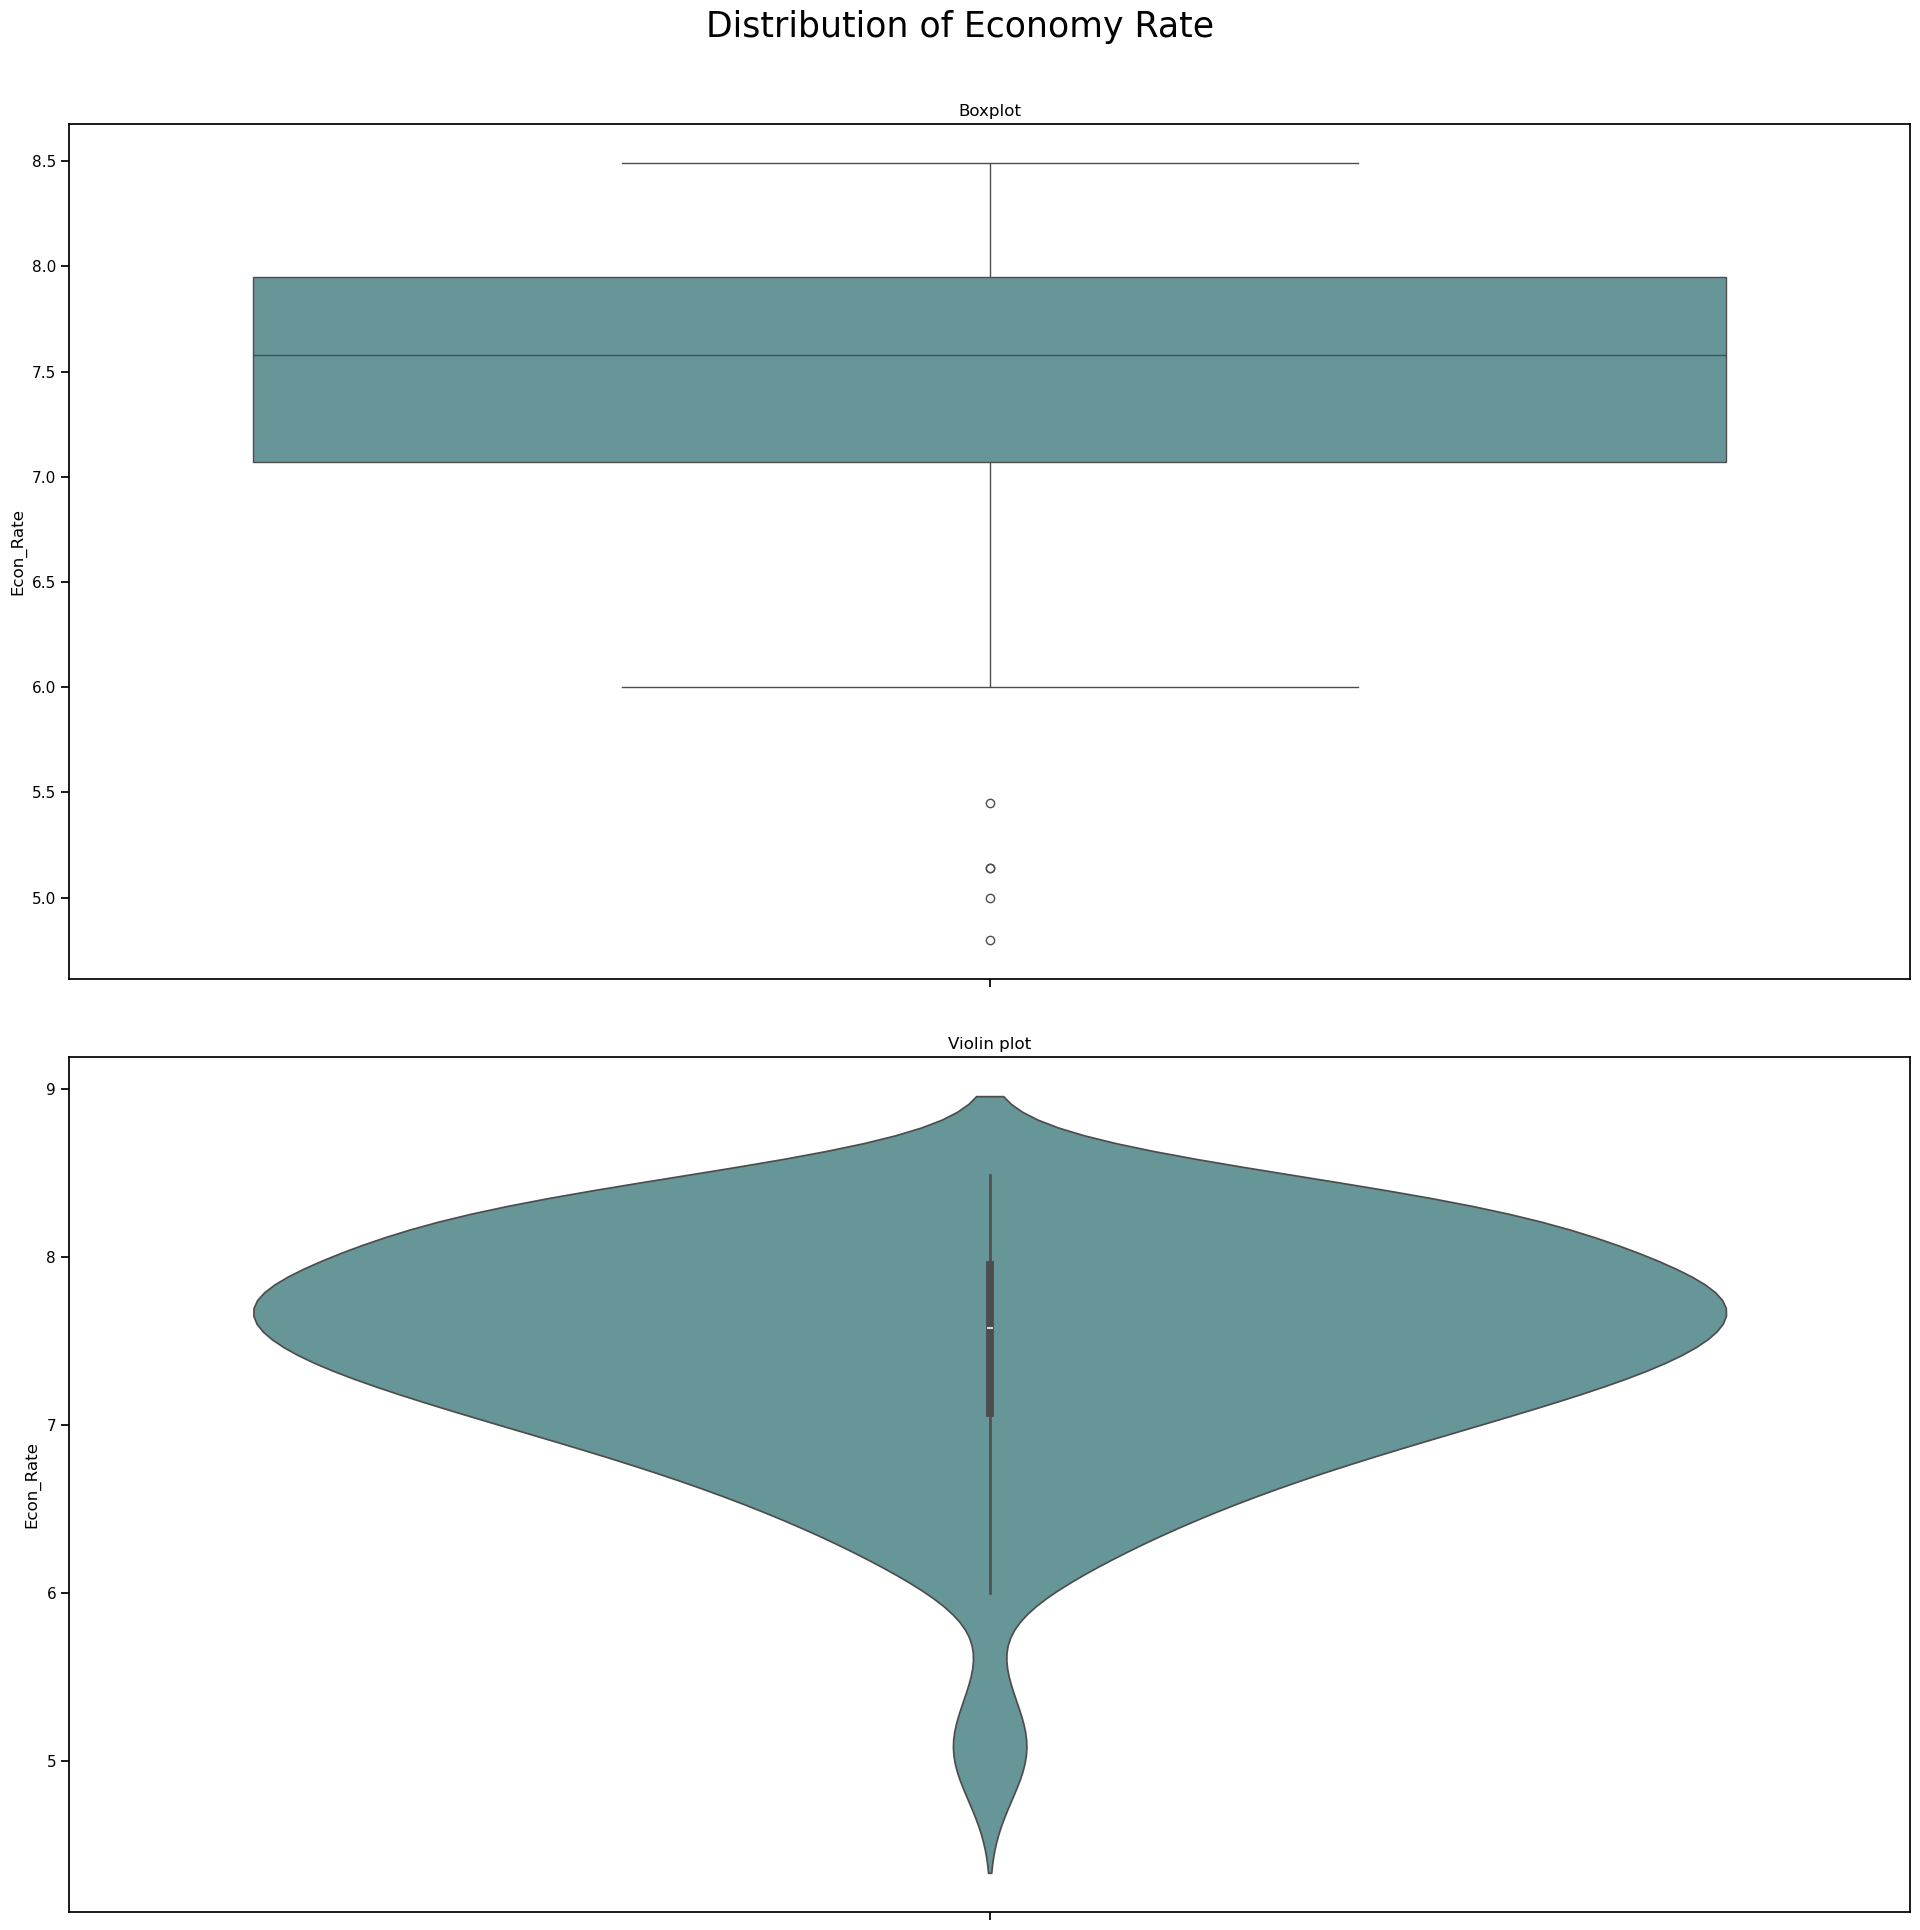

In [601]:
triple_plot(bowlers["Econ_Rate"],'Distribution of Economy Rate',custom_colors[1])

### K Means Clustering on Bowlers Data

Distortion
2 : 371.51694784849576
3 : 232.3573613084041
4 : 172.88356556675444
5 : 157.3546928966317
6 : 111.01556592942379
7 : 113.59399317632017
8 : 89.56680299249685
9 : 77.42688462918088
Inertia
2 : 33069999.41922775
3 : 16551209.986583302
4 : 7201644.983151199
5 : 5695697.4521271
6 : 3495754.144551593
7 : 2771355.682588293
8 : 1751092.6525203956
9 : 1460029.6148099857


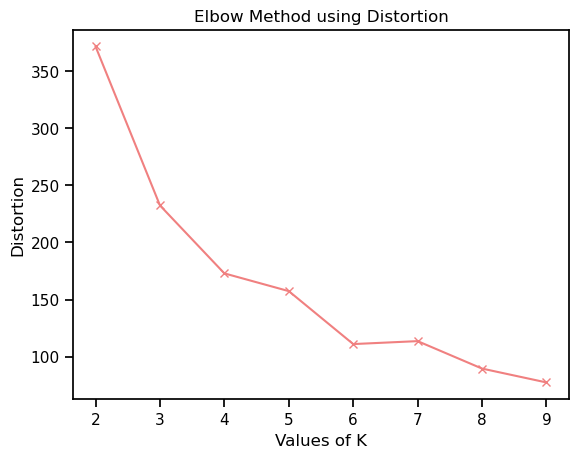

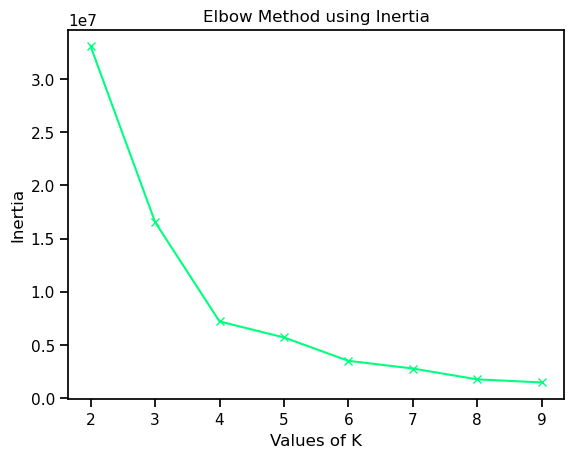

In [602]:
elbow_method(batsmen[["Strike_Rate", "Runs"]])

In [603]:
scores(batsmen[["Strike_Rate", "Runs"]])

k=3, Silhouette score=0.6780941966156916, Calinski harabasz score=620.3509145682089
k=4, Silhouette score=0.6934562078550669, Calinski harabasz score=1007.674951302528
k=5, Silhouette score=0.6636420080750323, Calinski harabasz score=1147.0550748280907
k=6, Silhouette score=0.6157214501481449, Calinski harabasz score=1124.24543833592
k=7, Silhouette score=0.6247345369477075, Calinski harabasz score=1445.7628534166051


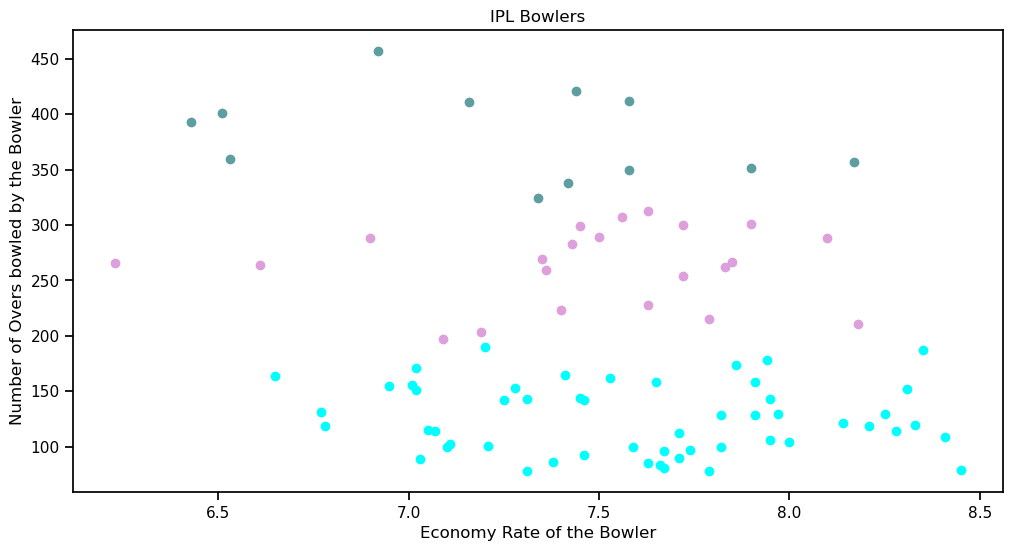

In [604]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bowlers[["Econ_Rate", "Over_count"]])
bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = custom_colors

for r in range(1,5):
    clustered_Bowlers = bowlers[bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Over_count"], color=colors[r-1])
    
plt.title("IPL Bowlers")
plt.xlabel("Economy Rate of the Bowler")
plt.ylabel("Number of Overs bowled by the Bowler")
    
plt.show()


In [605]:
bowlers = bowlers.sort_values(by = 'cluster')
bowlers.head()

,Player_Id,Runs,Over_count,Econ_Rate,cluster
10,63,458.0,54.333333,8.43,0
9,1,367.0,46.666667,7.86,0
17,68,98.0,12.500000,7.84,0
15,24,94.0,11.166667,8.42,0
23,118,366.0,54.833333,6.67,0


In [606]:
Players_bowlers = players[["Player_Id", "Player_Name","Bowling_Skill","DOB","Country"]]

Displaying the Bowling Skill of Batsmen

In [607]:
bowlers = bowlers[bowlers.columns].merge(Players_bowlers, "left")
bowlers

,Player_Id,Runs,Over_count,Econ_Rate,cluster,Player_Name,Bowling_Skill,DOB,Country
0,63,458.0,54.333333,8.43,0,LR Shukla,Right-arm medium,06-May-81,India
1,1,367.0,46.666667,7.86,0,SC Ganguly,Right-arm medium,08-Jul-72,India
2,68,98.0,12.500000,7.84,0,WA Mota,Right-arm medium,20-Sep-81,India
3,24,94.0,11.166667,8.42,0,K Goel,Right-arm offbreak,24-Dec-86,India
4,118,366.0,54.833333,6.67,0,GD McGrath,Right-arm fast-medium,09-Feb-70,Australia
...,...,...,...,...,...,...,...,...,...
209,293,1201.0,171.166667,7.02,3,S Nadeem,Slow left-arm orthodox,12-Aug-89,India
210,309,759.0,100.000000,7.59,3,KK Cooper,Right-arm medium,16-Feb-89,West Indies
211,310,1562.0,187.166667,8.35,3,JP Faulkner,Left-arm fast-medium,29-Apr-90,Australia
212,270,779.0,99.666667,7.82,3,S Aravind,Left-arm medium-fast,08-Apr-84,India


In [608]:
bowlers = bowlers[bowlers['Bowling_Skill'].notna()]

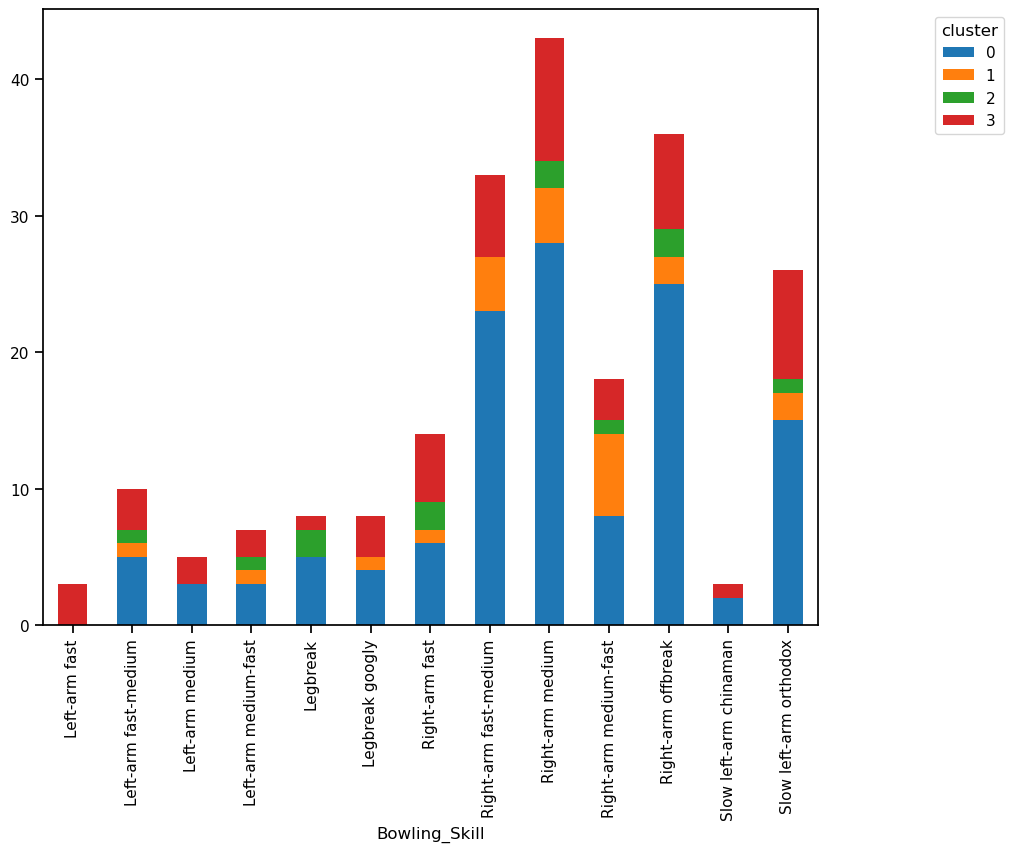

In [609]:
df_b = bowlers[['Bowling_Skill','cluster']].copy()
ct = pd.crosstab(df_b.Bowling_Skill, df_b.cluster)

ct.plot.bar(stacked=True)
plt.legend(title='cluster',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.show()

In [610]:
bowlers.to_csv('Bowlers.csv') 

In [611]:
final=pd.concat([batsmen,bowlers],sort=True).reset_index(drop=True)
final

,Balls_played,Batting_Hand,Bowling_Skill,Country,DOB,Econ_Rate,Over_count,Player_Id,Player_Name,Runs,Strike_Rate,cluster
0,55.0,Right_Hand,NaN,India,07-Oct-77,NaN,NaN,12,B Akhil,76.0,138.18,0
1,309.0,Right_Hand,NaN,South Africa,03-Dec-76,NaN,NaN,11,MV Boucher,394.0,127.51,0
2,186.0,Left_Hand,NaN,Australia,21-Aug-75,NaN,NaN,28,SM Katich,237.0,127.42,0
3,306.0,Right_Hand,NaN,Australia,24-Oct-78,NaN,NaN,25,JR Hopes,417.0,136.27,0
4,111.0,Right_Hand,NaN,South Africa,16-Jul-73,NaN,NaN,49,SM Pollock,147.0,132.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,Slow left-arm orthodox,India,12-Aug-89,7.02,171.166667,293,S Nadeem,1201.0,NaN,3
361,NaN,NaN,Right-arm medium,West Indies,16-Feb-89,7.59,100.000000,309,KK Cooper,759.0,NaN,3
362,NaN,NaN,Left-arm fast-medium,Australia,29-Apr-90,8.35,187.166667,310,JP Faulkner,1562.0,NaN,3
363,NaN,NaN,Left-arm medium-fast,India,08-Apr-84,7.82,99.666667,270,S Aravind,779.0,NaN,3


In [612]:
final.to_csv('final.csv')

### Example of a well-rounded Team
* Selecting top 6 batsmen

In [613]:
batsmen_team=batsmen[['Player_Name','Strike_Rate','DOB','Country']].sort_values(by=['Strike_Rate'],ascending=False)
batsmen_team=batsmen_team.head(6)
batsmen_team

,Player_Name,Strike_Rate,DOB,Country
84,CR Brathwaite,218.42,18-Jul-88,West Indies
22,Umar Gul,205.26,14-Apr-84,Pakistan
50,RS Sodhi,200.00,18-Oct-80,India
81,KH Pandya,191.13,24-Mar-91,India
87,BCJ Cutting,182.50,30-Jan-87,Australia
13,Shahid Afridi,176.09,01-Mar-80,Pakistan


### Selecting top 4 all rounders

In [614]:
d1 = pd.merge(batsmen,bowlers, how='inner', on=['Player_Id'])
d2 = pd.merge(d1,players, on='Player_Id')
all_rounder_team=d2[['Player_Name_x','Strike_Rate','Econ_Rate','DOB','Country']]
all_rounder_team.rename(columns = {'Player_Name_x':'Player_Name'}, inplace = True) 
all_rounder_team=all_rounder_team.head(4)
all_rounder_team

,Player_Name,Strike_Rate,Econ_Rate,DOB,Country
0,B Akhil,138.18,7.65,07-Oct-77,India
1,SM Pollock,132.43,6.58,16-Jul-73,South Africa
2,R Bhatia,120.74,7.35,22-Oct-79,India
3,MF Maharoof,143.90,7.24,07-Sep-84,India


### Selecting top 5 bowlers

In [615]:
bowlers_team=bowlers[['Player_Name','Econ_Rate','DOB','Country']].sort_values(by=['Econ_Rate'])
bowlers_team=bowlers_team.head(5)
bowlers_team

,Player_Name,Econ_Rate,DOB,Country
83,Sachin Baby,4.80,18-Dec-88,India
34,AM Rahane,5.00,06-Jun-88,India
100,SS Mundhe,5.14,27-Oct-88,India
47,LA Carseldine,5.14,17-Nov-75,Australia
20,DJ Thornely,5.45,01-Oct-78,Australia


### Well rounded team of 15 players

In [616]:
df=pd.concat([batsmen_team,all_rounder_team,bowlers_team],sort=True).drop_duplicates(subset='Player_Name', keep="first").reset_index(drop=True)
df=df[['Player_Name','Strike_Rate','Econ_Rate','DOB','Country']]
print("-"*30,"Well rounded team","-"*30,"\n")
df

------------------------------ Well rounded team ------------------------------ 



,Player_Name,Strike_Rate,Econ_Rate,DOB,Country
0,CR Brathwaite,218.42,NaN,18-Jul-88,West Indies
1,Umar Gul,205.26,NaN,14-Apr-84,Pakistan
2,RS Sodhi,200.00,NaN,18-Oct-80,India
3,KH Pandya,191.13,NaN,24-Mar-91,India
4,BCJ Cutting,182.50,NaN,30-Jan-87,Australia
5,Shahid Afridi,176.09,NaN,01-Mar-80,Pakistan
6,B Akhil,138.18,7.65,07-Oct-77,India
7,SM Pollock,132.43,6.58,16-Jul-73,South Africa
8,R Bhatia,120.74,7.35,22-Oct-79,India
9,MF Maharoof,143.90,7.24,07-Sep-84,India
